###### <center>In this file we will fill the missing value</center>
    1. First remove the columns which have larget amount of missing data
    2. Then we will use fillna place of using dropna function (mean,median)

###### Importing files

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


###### Importing data set

In [3]:
original_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1bw4NPmQXDApAd78dRIi0MUWJqiGp5XYH')

In [4]:
original_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
original_df.shape

(1460, 81)

In [5]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

###### Fetching null columns

In [15]:
missing_values = (original_df.isnull().sum()/original_df.shape[0])*100
missing_values

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [16]:
drop_col = missing_values[missing_values > 20].keys()
drop_col

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

###### Now we will remove the values having high null values

In [17]:
df_drop_1 = original_df.drop(columns=drop_col)

In [19]:
df_drop_1.shape

(1460, 76)

In [18]:
df_drop_1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

###### Now we will will our missing data with mean and median value and check which condition is most convient

In [20]:
df_num = df_drop_1.select_dtypes(include=["int64","float64"])

In [21]:
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


###### Checking missing data wiht the help of heatmap

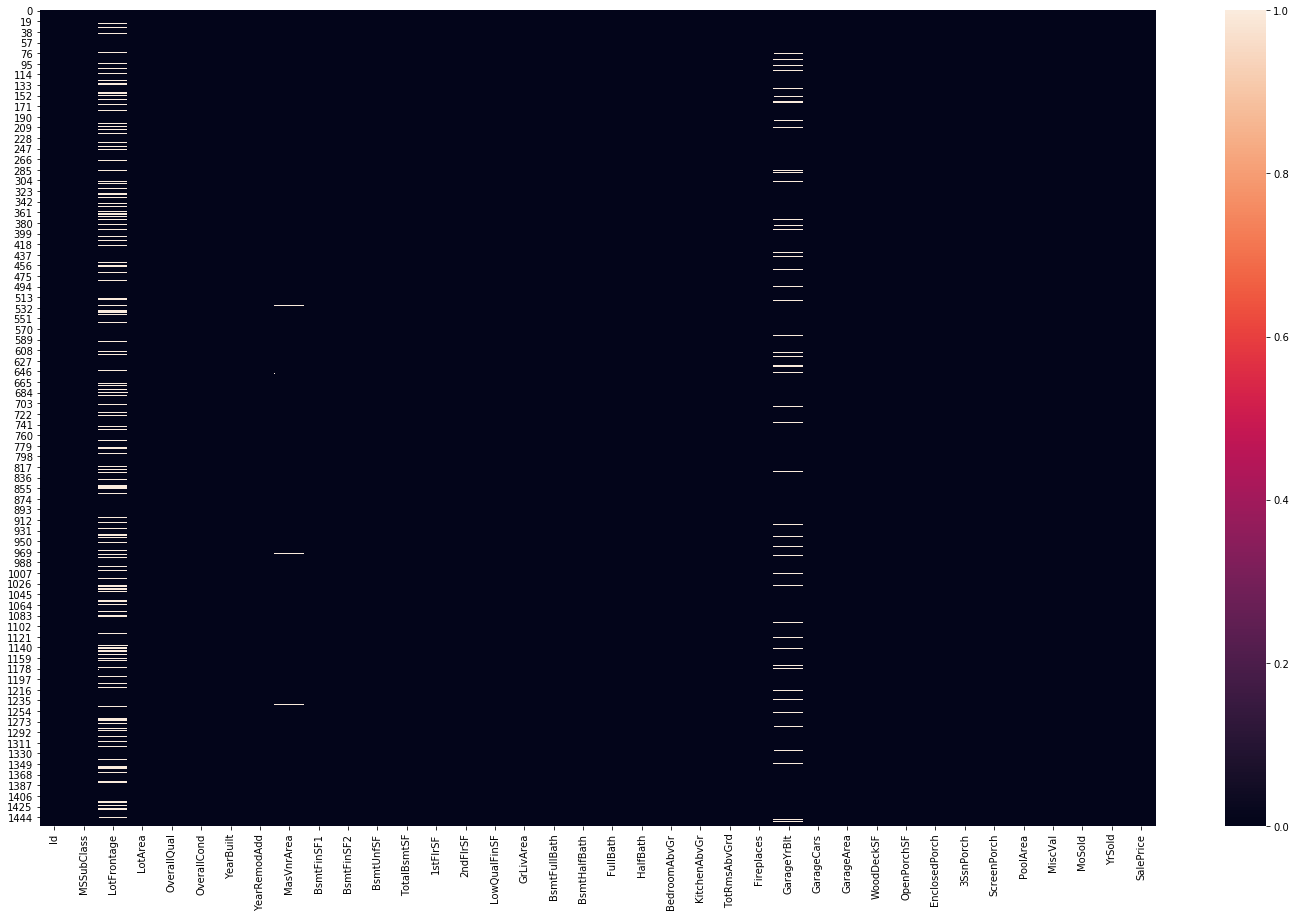

In [30]:
plt.figure(figsize=(25,15))
sns.heatmap(df_num.isnull())

In [25]:
df_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

###### Collecting remaining missing values from int and float data

In [27]:
missing_num_data = [var for var in df_num.columns if df_num[var].isnull().sum()>0]
missing_num_data

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

###### Now we have collected our missing values 

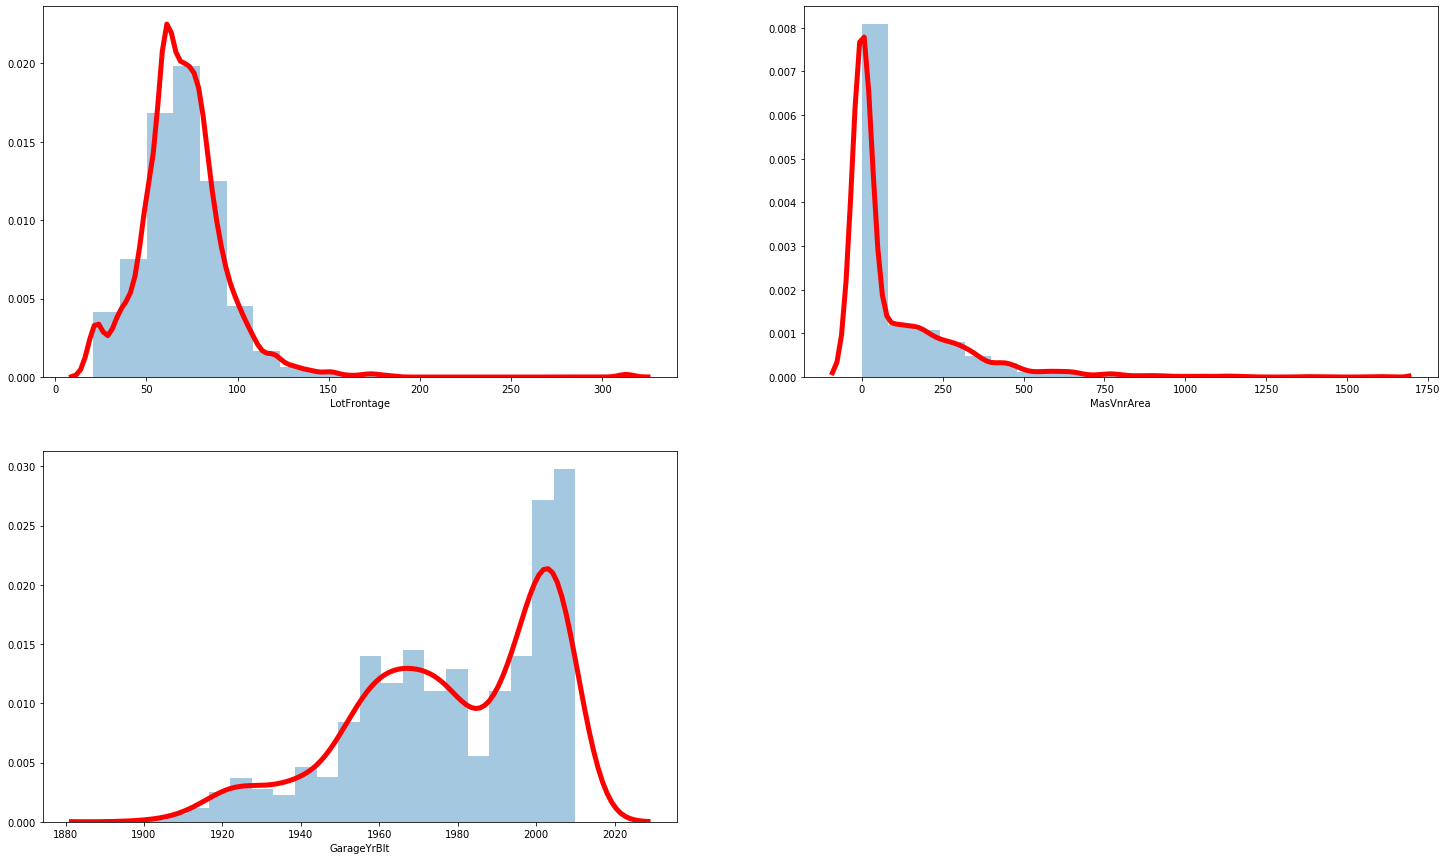

In [32]:
plt.figure(figsize=(25,15))
for i,var in enumerate(missing_num_data):
    plt.subplot(2,2,i+1)
    sns.distplot(df_num[var],bins=20,kde_kws={'linewidth':5,'color':'red'})
#this is our data after apply clearning 

### Now we will compare our data after filling the values

###### Filling with mean values

In [33]:
df_num.mean()

Id                  730.500000
MSSubClass           56.897260
LotFrontage          70.049958
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
MasVnrArea          103.685262
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
BedroomAbvGr          2.866438
KitchenAbvGr          1.046575
TotRmsAbvGrd          6.517808
Fireplaces            0.613014
GarageYrBlt        1978.506164
GarageCars            1.767123
GarageArea          472.980137
WoodDeckSF           94.244521
OpenPorchSF          46.660274
EnclosedPorch        21.954110
3SsnPorch             3.409589
ScreenPo

In [35]:
df_num_mean = df_num.fillna(df_num.mean())
#checking if any null value is lefft or not
df_num_mean.isnull().sum().sum()

0

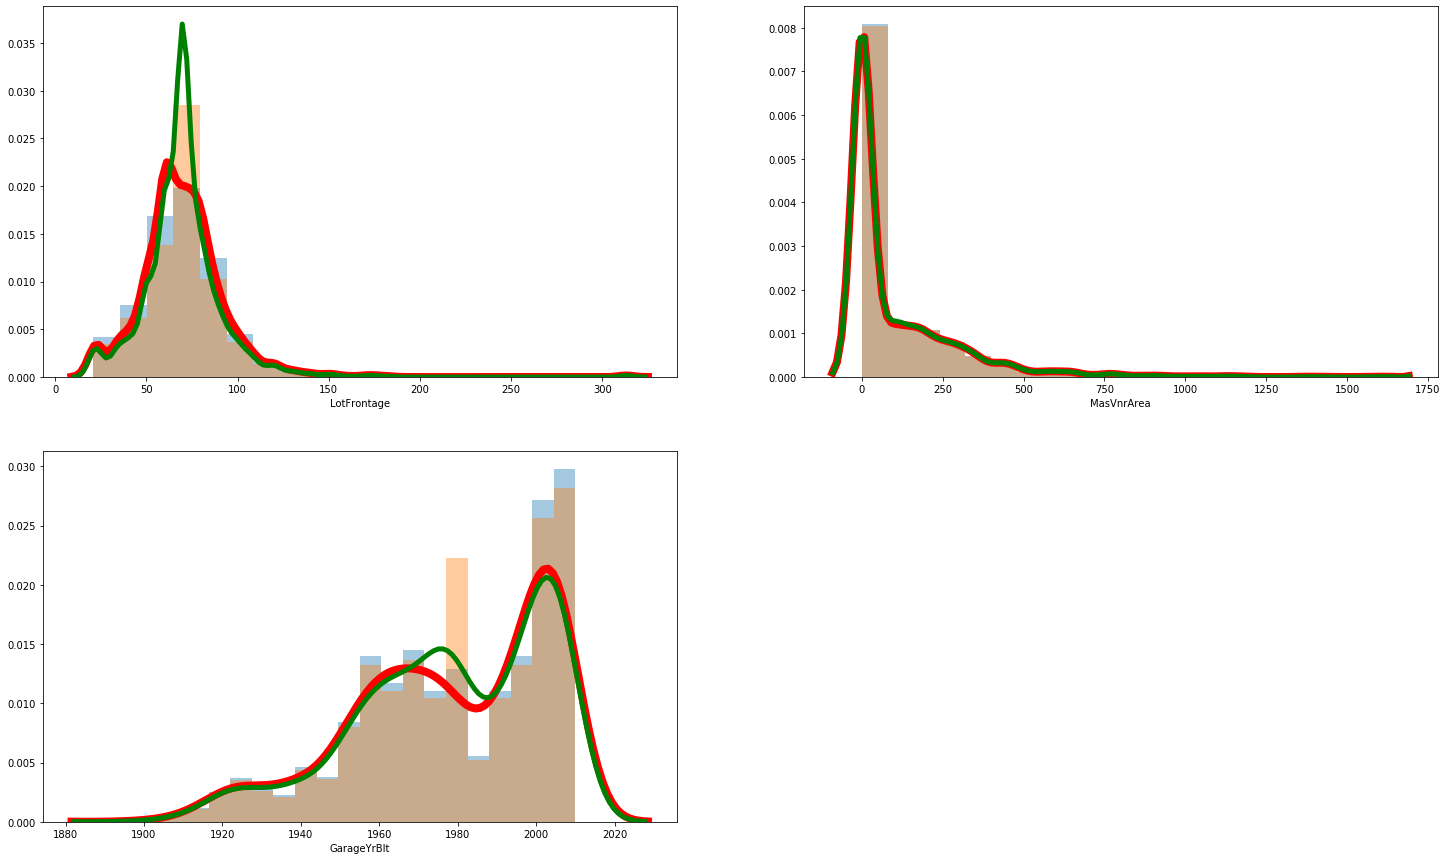

In [37]:
plt.figure(figsize=(25,15))
for i,var in enumerate(missing_num_data):
    plt.subplot(2,2,i+1)
    sns.distplot(df_num[var],bins=20,kde_kws={"linewidth":8,"color":"red"},label="original")
    sns.distplot(df_num_mean[var],bins=20,kde_kws={"linewidth":5,"color":"green"},label ="fillna")
#here we crated a graph of missing values and checking that after filling data how our filteredd data works

###### Now we will fill with median value

In [39]:
df_num_median = df_num.fillna(df_num.median())
df_num_median.isnull().sum().sum()

0

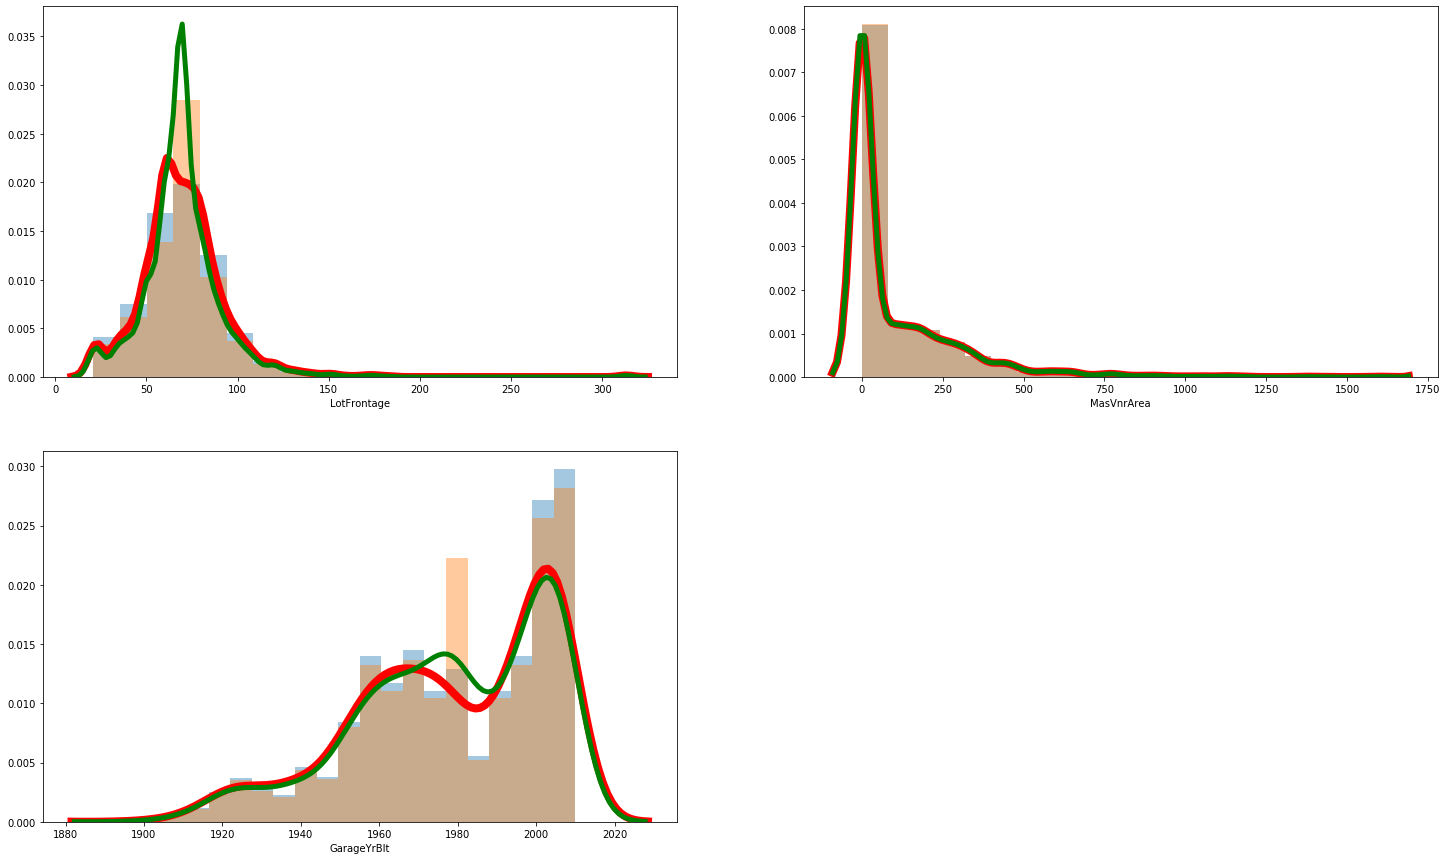

In [40]:
plt.figure(figsize=(25,15))
for i,var in enumerate(missing_num_data):
    plt.subplot(2,2,i+1)
    sns.distplot(df_num[var],bins=20,kde_kws={"linewidth":8,"color":"red"},label="original")
    sns.distplot(df_num_median[var],bins=20,kde_kws={"linewidth":5,"color":"green"},label ="fillna")
#here we crated a graph of missing values and checking that after filling data how our filteredd data works